<a href="https://colab.research.google.com/github/arad1367/Dresden_April2024_UniCourse/blob/main/8_Deep_learning_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

from tensorflow.keras.utils import plot_model

### What is deep learning?
* Deep learning is a subset of machine learning that uses artificial intelligence algorithms to model and solve complex problems. It involves training artificial neural networks on a large amount of data, which allows them to recognize patterns and make predictions.

In [ ]:
from IPython.display import Image
desc = Image = Image(url="https://media.geeksforgeeks.org/wp-content/uploads/20230413105611/Maachine-Learning.webp")
desc

### TensorFlow playground
* https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.09622&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

### Deep learning steps
- Introduction to tensors
- Convert an array to tensor
- A regression problem with deep learning
    * Import data
    * Preprocessing
    * Features and target variables
    * Split the data
    * Create, compile and fit the model
    * Model summary
    * Model visualisation
    * Make prediction
    * Model evaluation
    * Loss curve plot

### Introduction to tensors

In [14]:
simple_tensor = tf.constant(np.linspace(1, 10, 20),
                            dtype=tf.float32)
simple_tensor.dtype
simple_tensor.ndim, simple_tensor.shape

(1, TensorShape([20]))

In [16]:
random_tensor = tf.random.uniform([2, 3], 0, 1)
random_tensor

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.1324724 , 0.76340413, 0.92067385],
       [0.5221237 , 0.55282164, 0.24545777]], dtype=float32)>

### Convert numpy array to tensor

In [18]:
array_1 = np.linspace(1, 100, 10)
array_1

array_to_tensor = tf.convert_to_tensor(array_1)
array_to_tensor

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.])>

### Boston housing regression problem with deep learning

### 1. Import data

In [19]:
data_path = "/content/boston.csv"

data = pd.read_csv(data_path)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [21]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 2. Preprocessing step

In [23]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 3. Features(X) and target (y)

In [25]:
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

y[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### 4. Split data

In [29]:
# from sklearn.model_selection import train_test_split
# train 70% , validation 15% , test 15%
import math

train_bound = math.ceil(0.7 * len(data))
validation_bound = train_bound + math.ceil(0.15 * len(data))

X_train, y_train = X[:train_bound], y[:train_bound]
X_valid, y_valid = X[train_bound:validation_bound], y[train_bound:validation_bound]
X_test, y_test = X[validation_bound:], y[validation_bound:]

print(f"len of X_train {len(X_train)} ---- len of y_train {len(y_train)}")
print(f"len of X_validation {len(X_valid)} ---- len of y_validation {len(y_valid)}")
print(f"len of X_test {len(X_test)} ---- len of y_test {len(y_test)}")

len of X_train 355 ---- len of y_train 355
len of X_validation 76 ---- len of y_validation 76
len of X_test 75 ---- len of y_test 75


### 5. Create, compile and fit the model

In [44]:
# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu", name="hidden_layer1"),
    tf.keras.layers.Dense(10, activation="relu", name="hidden_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "Model1")

# Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"]
                )

# Fit the model
history_1 = model_1.fit(X_train, y_train,
                        validation_data=(X_valid, y_valid),
                        epochs=10)

Epoch 1/10
12/12 [==============================] - 2s 31ms/step - loss: 10.5822 - mae: 10.5822 - val_loss: 32.6551 - val_mae: 32.6551
Epoch 2/10
12/12 [==============================] - 0s 8ms/step - loss: 9.6885 - mae: 9.6885 - val_loss: 30.3175 - val_mae: 30.3175
Epoch 3/10
12/12 [==============================] - 0s 9ms/step - loss: 8.9905 - mae: 8.9905 - val_loss: 29.1708 - val_mae: 29.1708
Epoch 4/10
12/12 [==============================] - 0s 8ms/step - loss: 8.2472 - mae: 8.2472 - val_loss: 26.3913 - val_mae: 26.3913
Epoch 5/10
12/12 [==============================] - 0s 12ms/step - loss: 7.6204 - mae: 7.6204 - val_loss: 23.7918 - val_mae: 23.7918
Epoch 6/10
12/12 [==============================] - 0s 8ms/step - loss: 7.1743 - mae: 7.1743 - val_loss: 20.1203 - val_mae: 20.1203
Epoch 7/10
12/12 [==============================] - 0s 9ms/step - loss: 6.6152 - mae: 6.6152 - val_loss: 19.1995 - val_mae: 19.1995
Epoch 8/10
12/12 [==============================] - 0s 9ms/step - loss: 

In [36]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu", name="hidden_layer1"),
    tf.keras.layers.Dense(10, activation="relu", name="hidden_layer2"),
    tf.keras.layers.Dense(5, activation="relu", name="hidden_layer3"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model_2")

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

history_2 = model_2.fit(X_train, y_train,
                        validation_data=(X_valid, y_valid),
                        epochs=10)


Epoch 1/10
12/12 [==============================] - 1s 24ms/step - loss: 131.6752 - mae: 131.6752 - val_loss: 147.4969 - val_mae: 147.4969
Epoch 2/10
12/12 [==============================] - 0s 5ms/step - loss: 100.3150 - mae: 100.3150 - val_loss: 111.0147 - val_mae: 111.0147
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 73.5028 - mae: 73.5028 - val_loss: 79.5491 - val_mae: 79.5491
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 50.2648 - mae: 50.2648 - val_loss: 51.8721 - val_mae: 51.8721
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 30.7022 - mae: 30.7022 - val_loss: 29.9969 - val_mae: 29.9969
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 25.1407 - mae: 25.1407 - val_loss: 25.2560 - val_mae: 25.2560
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 24.9637 - mae: 24.9637 - val_loss: 22.8889 - val_mae: 22.8889
Epoch 8/10
12/12 [==============================] - 0

### 6. Summary of models

In [38]:
model_1.summary()
model_2.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 10)                140       
                                                                 
 hidden_layer2 (Dense)       (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 10)                140       
                                                                 
 hidden_layer

### 7. Visualization of models

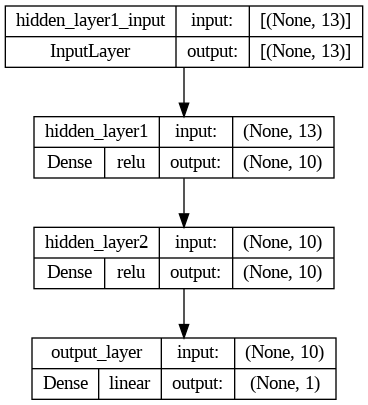

In [39]:
plot_model(model=model_1,
           show_shapes=True,
           show_layer_activations=True)

### 8. Make some predictions

In [40]:
y_pred = model_1.predict(X_test)
y_pred[:10]

3/3 [==============================] - 0s 4ms/step


array([[29.611143],
       [26.7538  ],
       [27.13562 ],
       [27.552893],
       [26.726612],
       [35.091026],
       [37.927254],
       [31.135761],
       [14.724636],
       [15.119034]], dtype=float32)

### 9. Evaluation of models

In [41]:
model_1.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 8.4354 - mae: 8.4354


[8.435365676879883, 8.435365676879883]

### 10. Loss & curve plot

Text(0, 0.5, 'loss')

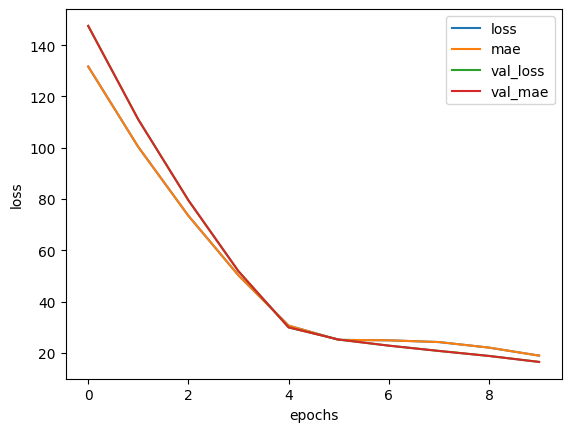

In [46]:
import pandas as pd

pd.DataFrame(history_2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")